# Prediction-of-Motor-Failure-Time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Import

In [2]:
df_raw=pd.read_csv('accelerometer.csv')

In [3]:
df=df_raw.copy()

In [4]:
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wconfid,153000.0,2.000000,0.816499,1.000,1.000,2.000,3.000,3.000
pctid,153000.0,60.000000,24.494977,20.000,40.000,60.000,80.000,100.000
x,153000.0,0.995622,0.773958,-8.000,0.945,0.992,1.039,7.996
y,153000.0,0.005351,0.742602,-8.000,-0.078,0.008,0.105,7.996
z,153000.0,-0.117769,0.517008,-5.867,-0.172,-0.125,-0.066,6.086


In [7]:
df.isna().sum()

wconfid    0
pctid      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.nunique()

wconfid       3
pctid        17
x          2733
y          2653
z          1808
dtype: int64

## EDA

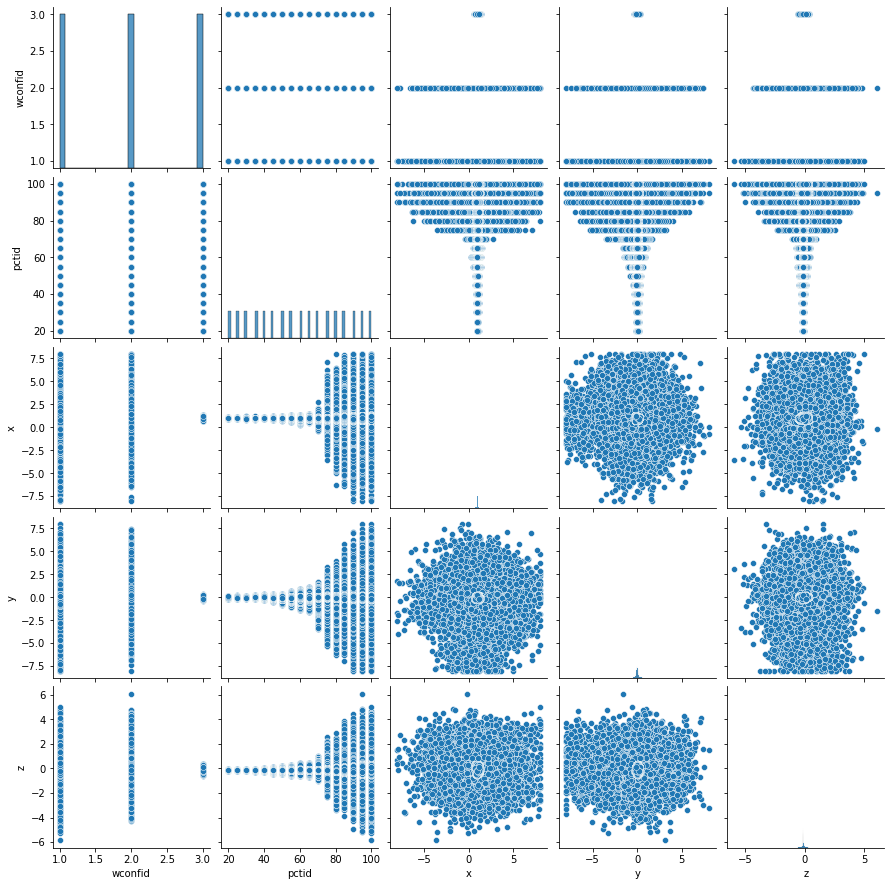

In [9]:
sns.pairplot(df)

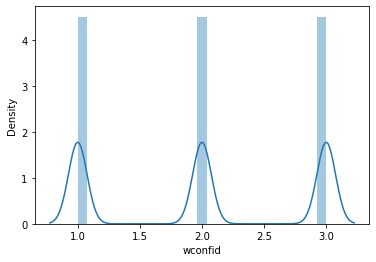

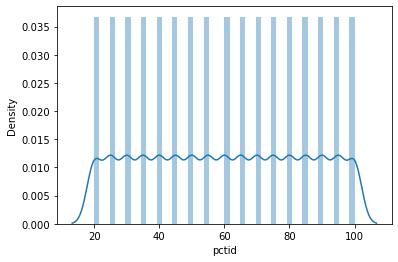

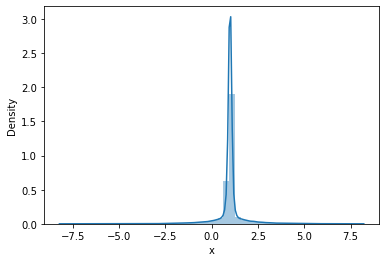

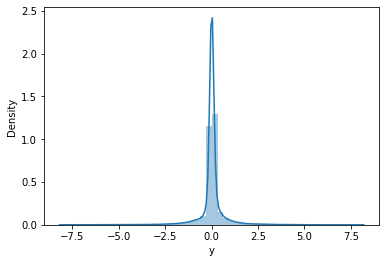

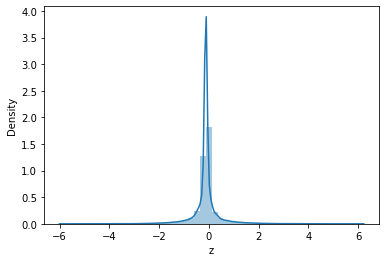

In [10]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:>

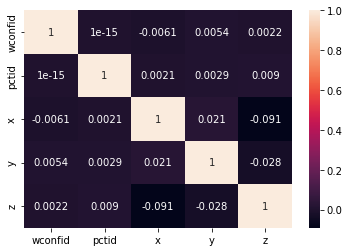

In [11]:
sns.heatmap(df.corr(),annot=True)

## Split Data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.drop('wconfid',axis=1)
y=df['wconfid']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Standardize

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [16]:
X_train[['pctid']]=sc.fit_transform(X_train[['pctid']])
X_test[['pctid']]=sc.transform(X_test[['pctid']])

## Models

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [18]:
M1=DecisionTreeClassifier()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,P1))
print('\n')
print('classification_repor:',classification_report(y_test,P1))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P1))
print('\n')
print('ROC:',roc_auc_score(y_test,M1.predict_proba(X_test), multi_class='ovr'))

confusion_matrix: [[ 9124  4763  1366]
 [ 4984  9121  1301]
 [ 1520  1398 12323]]


classification_repor:               precision    recall  f1-score   support

           1       0.58      0.60      0.59     15253
           2       0.60      0.59      0.59     15406
           3       0.82      0.81      0.82     15241

    accuracy                           0.67     45900
   macro avg       0.67      0.67      0.67     45900
weighted avg       0.67      0.67      0.67     45900



Accuracy: 66.59694989106754


ROC: 0.7547050354866846


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
M2=RandomForestClassifier()
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,P2))
print('\n')
print('classification_repor:',classification_report(y_test,P2))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P2))
print('\n')
print('ROC:',roc_auc_score(y_test,M2.predict_proba(X_test), multi_class='ovr'))

confusion_matrix: [[ 9688  4201  1364]
 [ 4122  9925  1359]
 [  989  1103 13149]]


classification_repor:               precision    recall  f1-score   support

           1       0.65      0.64      0.64     15253
           2       0.65      0.64      0.65     15406
           3       0.83      0.86      0.85     15241

    accuracy                           0.71     45900
   macro avg       0.71      0.71      0.71     45900
weighted avg       0.71      0.71      0.71     45900



Accuracy: 71.37690631808279


ROC: 0.882277952349936


## NB

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
M3=GaussianNB()
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,P3))
print('\n')
print('classification_repor:',classification_report(y_test,P3))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P3))
print('\n')
print('ROC:',roc_auc_score(y_test,M3.predict_proba(X_test), multi_class='ovr'))

confusion_matrix: [[ 3679  4047  7527]
 [ 2538  4970  7898]
 [    0   878 14363]]


classification_repor:               precision    recall  f1-score   support

           1       0.59      0.24      0.34     15253
           2       0.50      0.32      0.39     15406
           3       0.48      0.94      0.64     15241

    accuracy                           0.50     45900
   macro avg       0.53      0.50      0.46     45900
weighted avg       0.53      0.50      0.46     45900



Accuracy: 50.13507625272331


ROC: 0.6685984241426883


## Knn

In [23]:
from sklearn.neighbors import KNeighborsClassifier

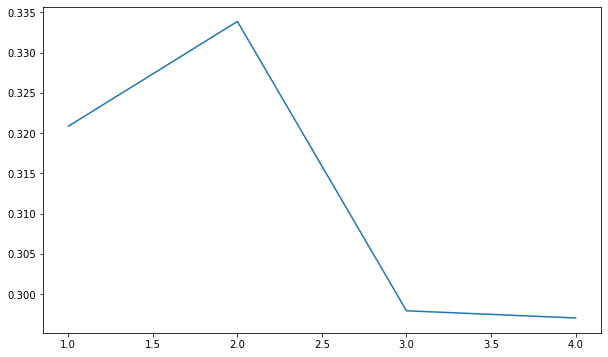

In [24]:
error_Mat=[]
for i in range (1,5):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range (1,5),error_Mat)

In [25]:
M4=KNeighborsClassifier(n_neighbors=2)
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,P4))
print('\n')
print('classification_repor:',classification_report(y_test,P4))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P4))
print('\n')
print('ROC:',roc_auc_score(y_test,M4.predict_proba(X_test), multi_class='ovr'))

confusion_matrix: [[11722  2807   724]
 [ 7268  7428   710]
 [ 2193  1623 11425]]


classification_repor:               precision    recall  f1-score   support

           1       0.55      0.77      0.64     15253
           2       0.63      0.48      0.54     15406
           3       0.89      0.75      0.81     15241

    accuracy                           0.67     45900
   macro avg       0.69      0.67      0.67     45900
weighted avg       0.69      0.67      0.67     45900



Accuracy: 66.61220043572985


ROC: 0.8172881770582715


## GB Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
M5=GradientBoostingClassifier()
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,P5))
print('\n')
print('classification_repor:',classification_report(y_test,P5))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P5))
print('\n')
print('ROC:',roc_auc_score(y_test,M5.predict_proba(X_test), multi_class='ovr'))

confusion_matrix: [[ 7783  4767  2703]
 [ 3871  8835  2700]
 [  535   942 13764]]


classification_repor:               precision    recall  f1-score   support

           1       0.64      0.51      0.57     15253
           2       0.61      0.57      0.59     15406
           3       0.72      0.90      0.80     15241

    accuracy                           0.66     45900
   macro avg       0.65      0.66      0.65     45900
weighted avg       0.65      0.66      0.65     45900



Accuracy: 66.19172113289761


ROC: 0.8491548794425139


## HistBoosting

In [28]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [29]:
M6=HistGradientBoostingClassifier()
M6.fit(X_train,y_train)
P6=M6.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,P6))
print('\n')
print('classification_repor:',classification_report(y_test,P6))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P6))
print('\n')
print('ROC:',roc_auc_score(y_test,M6.predict_proba(X_test), multi_class='ovr'))

confusion_matrix: [[ 9435  4425  1393]
 [ 3616 10308  1482]
 [  703  1032 13506]]


classification_repor:               precision    recall  f1-score   support

           1       0.69      0.62      0.65     15253
           2       0.65      0.67      0.66     15406
           3       0.82      0.89      0.85     15241

    accuracy                           0.72     45900
   macro avg       0.72      0.72      0.72     45900
weighted avg       0.72      0.72      0.72     45900



Accuracy: 72.43790849673204


ROC: 0.8892427286607133


## Light GBM

In [30]:
from lightgbm import LGBMClassifier

In [31]:
M7=LGBMClassifier()
M7.fit(X_train,y_train)
P7=M7.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,P7))
print('\n')
print('classification_repor:',classification_report(y_test,P7))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P7))
print('\n')
print('ROC:',roc_auc_score(y_test,M7.predict_proba(X_test), multi_class='ovr'))

confusion_matrix: [[ 9429  4353  1471]
 [ 3722 10098  1586]
 [  683  1061 13497]]


classification_repor:               precision    recall  f1-score   support

           1       0.68      0.62      0.65     15253
           2       0.65      0.66      0.65     15406
           3       0.82      0.89      0.85     15241

    accuracy                           0.72     45900
   macro avg       0.72      0.72      0.72     45900
weighted avg       0.72      0.72      0.72     45900



Accuracy: 71.94771241830065


ROC: 0.8862226529023652


## CAT Boosting

In [32]:
from catboost import CatBoostClassifier

In [33]:
M8=CatBoostClassifier()
M8.fit(X_train,y_train)
P8=M8.predict(X_test)

Learning rate set to 0.100425
0:	learn: 1.0619656	total: 703ms	remaining: 11m 42s
1:	learn: 1.0273709	total: 771ms	remaining: 6m 24s
2:	learn: 1.0006615	total: 853ms	remaining: 4m 43s
3:	learn: 0.9765364	total: 940ms	remaining: 3m 54s
4:	learn: 0.9558163	total: 1s	remaining: 3m 20s
5:	learn: 0.9368281	total: 1.05s	remaining: 2m 53s
6:	learn: 0.9205765	total: 1.09s	remaining: 2m 34s
7:	learn: 0.9035241	total: 1.15s	remaining: 2m 22s
8:	learn: 0.8900016	total: 1.21s	remaining: 2m 12s
9:	learn: 0.8767882	total: 1.26s	remaining: 2m 4s
10:	learn: 0.8644421	total: 1.3s	remaining: 1m 57s
11:	learn: 0.8539783	total: 1.35s	remaining: 1m 51s
12:	learn: 0.8445835	total: 1.4s	remaining: 1m 46s
13:	learn: 0.8355170	total: 1.46s	remaining: 1m 42s
14:	learn: 0.8276462	total: 1.52s	remaining: 1m 39s
15:	learn: 0.8208132	total: 1.58s	remaining: 1m 37s
16:	learn: 0.8154020	total: 1.64s	remaining: 1m 34s
17:	learn: 0.8093708	total: 1.69s	remaining: 1m 32s
18:	learn: 0.8046871	total: 1.73s	remaining: 1m 2

In [34]:
print('confusion_matrix:',confusion_matrix(y_test,P8))
print('\n')
print('classification_repor:',classification_report(y_test,P8))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P8))
print('\n')
print('ROC:',roc_auc_score(y_test,M8.predict_proba(X_test), multi_class='ovr'))

confusion_matrix: [[ 9437  4407  1409]
 [ 3596 10329  1481]
 [  720   974 13547]]


classification_repor:               precision    recall  f1-score   support

           1       0.69      0.62      0.65     15253
           2       0.66      0.67      0.66     15406
           3       0.82      0.89      0.86     15241

    accuracy                           0.73     45900
   macro avg       0.72      0.73      0.72     45900
weighted avg       0.72      0.73      0.72     45900



Accuracy: 72.57734204793029


ROC: 0.892526174345735


## ADA Boost

In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
M9=AdaBoostClassifier()
M9.fit(X_train,y_train)
P9=M9.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,P9))
print('\n')
print('classification_repor:',classification_report(y_test,P9))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P9))
print('\n')
print('ROC:',roc_auc_score(y_test,M9.predict_proba(X_test), multi_class='ovr'))

confusion_matrix: [[ 4686  6710  3857]
 [ 3974  7246  4186]
 [  234   498 14509]]


classification_repor:               precision    recall  f1-score   support

           1       0.53      0.31      0.39     15253
           2       0.50      0.47      0.49     15406
           3       0.64      0.95      0.77     15241

    accuracy                           0.58     45900
   macro avg       0.56      0.58      0.55     45900
weighted avg       0.56      0.58      0.55     45900



Accuracy: 57.605664488017425


ROC: 0.8003330152504234


## Neural Network

In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
M10=MLPClassifier(hidden_layer_sizes=(10,))
M10.fit(X_train,y_train)
P10=M10.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,P10))
print('\n')
print('classification_repor:',classification_report(y_test,P10))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P10))
print('\n')
print('ROC:',roc_auc_score(y_test,M10.predict_proba(X_test), multi_class='ovr'))

confusion_matrix: [[ 6936  6076  2241]
 [ 4353  8327  2726]
 [ 1165   681 13395]]


classification_repor:               precision    recall  f1-score   support

           1       0.56      0.45      0.50     15253
           2       0.55      0.54      0.55     15406
           3       0.73      0.88      0.80     15241

    accuracy                           0.62     45900
   macro avg       0.61      0.62      0.61     45900
weighted avg       0.61      0.62      0.61     45900



Accuracy: 62.43572984749456


ROC: 0.8245456356436905


## Bagging Classifier

In [39]:
from sklearn.ensemble import BaggingClassifier

In [40]:
M11=BaggingClassifier(base_estimator=GradientBoostingClassifier())
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,P11))
print('\n')
print('classification_repor:',classification_report(y_test,P11))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P11))
print('\n')
print('ROC:',roc_auc_score(y_test,M11.predict_proba(X_test), multi_class='ovr'))

confusion_matrix: [[ 7811  4825  2617]
 [ 3916  8810  2680]
 [  525   953 13763]]


classification_repor:               precision    recall  f1-score   support

           1       0.64      0.51      0.57     15253
           2       0.60      0.57      0.59     15406
           3       0.72      0.90      0.80     15241

    accuracy                           0.66     45900
   macro avg       0.65      0.66      0.65     45900
weighted avg       0.65      0.66      0.65     45900



Accuracy: 66.19607843137256


ROC: 0.8500933803703558


## Hyper parameter tuning

In [41]:
param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

In [42]:
from sklearn.model_selection import RandomizedSearchCV


rs = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=True, cv = 10, n_iter=5)
rs.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae',
                                                      'friedman_mse'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', None],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450],
                                        'subsample': [0.8, 0.9, 1.0]},
                   return_train_score=True, verbose=True)

In [44]:
P12=rs.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,P12))
print('\n')
print('classification_repor:',classification_report(y_test,P12))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P12))
print('\n')
print('ROC:',roc_auc_score(y_test,rs.predict_proba(X_test), multi_class='ovr'))

confusion_matrix: [[ 9070  4697  1486]
 [ 3872  9863  1671]
 [  732  1014 13495]]


classification_repor:               precision    recall  f1-score   support

           1       0.66      0.59      0.63     15253
           2       0.63      0.64      0.64     15406
           3       0.81      0.89      0.85     15241

    accuracy                           0.71     45900
   macro avg       0.70      0.71      0.70     45900
weighted avg       0.70      0.71      0.70     45900



Accuracy: 70.64923747276688


ROC: 0.877390762851328


In [45]:
rs.best_params_

{'subsample': 0.9,
 'n_estimators': 300,
 'max_leaf_nodes': 8,
 'max_features': 'sqrt',
 'max_depth': 4,
 'learning_rate': 0.15,
 'criterion': 'mse'}

In [46]:
Name=['DecisionTreeClassifier','Random Forest','NB','Knn','GB Boosting','HistBoosting','Light GBM','CAT Boosting','ADA Boost',
     'Neural Network','Bagging Classifier']
clfs= [M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11]

In [49]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    ROC=roc_auc_score(y_test,i.predict_proba(X_test), multi_class='ovr')
    results.append(ROC)

Learning rate set to 0.100425
0:	learn: 1.0619656	total: 53.6ms	remaining: 53.6s
1:	learn: 1.0273709	total: 101ms	remaining: 50.6s
2:	learn: 1.0006615	total: 173ms	remaining: 57.6s
3:	learn: 0.9765364	total: 245ms	remaining: 1m
4:	learn: 0.9558163	total: 316ms	remaining: 1m 2s
5:	learn: 0.9368281	total: 364ms	remaining: 1m
6:	learn: 0.9205765	total: 407ms	remaining: 57.8s
7:	learn: 0.9035241	total: 451ms	remaining: 55.9s
8:	learn: 0.8900016	total: 492ms	remaining: 54.2s
9:	learn: 0.8767882	total: 534ms	remaining: 52.9s
10:	learn: 0.8644421	total: 576ms	remaining: 51.8s
11:	learn: 0.8539783	total: 618ms	remaining: 50.9s
12:	learn: 0.8445835	total: 663ms	remaining: 50.3s
13:	learn: 0.8355170	total: 709ms	remaining: 49.9s
14:	learn: 0.8276462	total: 752ms	remaining: 49.4s
15:	learn: 0.8208132	total: 794ms	remaining: 48.8s
16:	learn: 0.8154020	total: 835ms	remaining: 48.3s
17:	learn: 0.8093708	total: 879ms	remaining: 47.9s
18:	learn: 0.8046871	total: 929ms	remaining: 48s
19:	learn: 0.79710

In [52]:
score= pd.DataFrame(results,index=Name)
score.columns=['ROC']
score.sort_values(by='ROC',ascending=False)

,ROC
CAT Boosting,0.892526
HistBoosting,0.889503
Light GBM,0.886223
Random Forest,0.882532
Bagging Classifier,0.850061
GB Boosting,0.849155
Neural Network,0.824238
Knn,0.817288
ADA Boost,0.800333
DecisionTreeClassifier,0.754527
